In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

plt.rcParams['image.cmap'] = 'gray'

from tensorflow.keras.datasets import mnist

#import pandas as pd

In [2]:
batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [3]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)



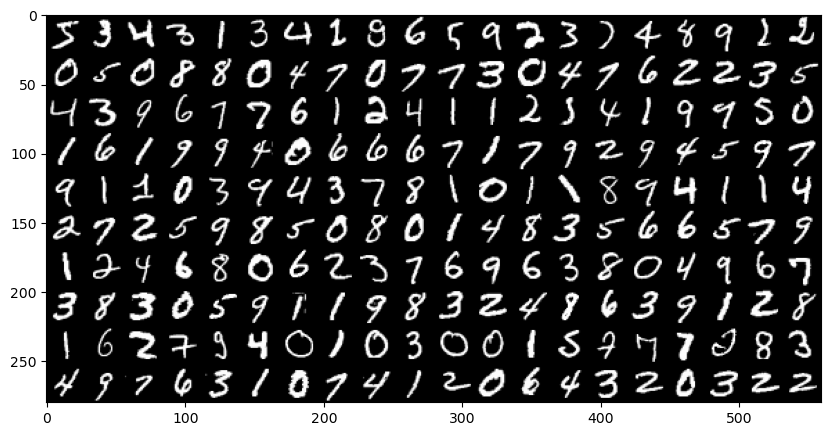

In [4]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(x_train));

In [ ]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True,n_iter=100)
rbm.fit(x_train.reshape(len(x_train),28*28))



[BernoulliRBM] Iteration 1, pseudo-likelihood = -112.06, time = 6.80s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -99.49, time = 10.45s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -91.36, time = 8.41s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -87.91, time = 8.96s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.35, time = 8.63s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -83.88, time = 8.99s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -83.19, time = 8.68s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -81.55, time = 8.43s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.08, time = 8.30s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -80.14, time = 8.42s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -79.48, time = 8.82s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -78.36, time = 8.15s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -78.29, time = 8.06s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -78.23, time = 8.94s
[BernoulliRBM] Iteration 15

In [ ]:
# sampling

xx = x_train[:40].reshape(40,28*28).copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

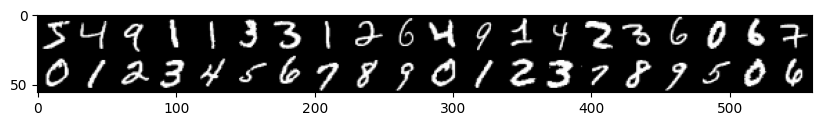

In [12]:
xx = x_train[:40].reshape(40,28*28).copy()
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

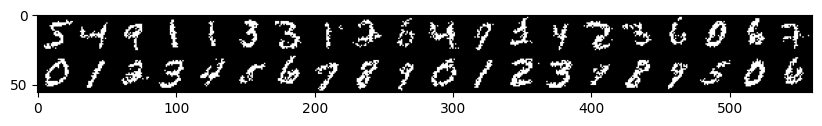

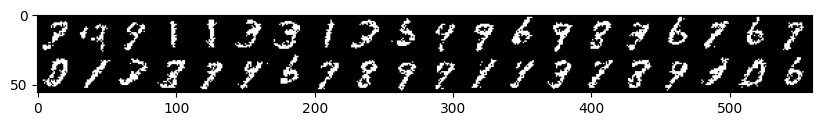

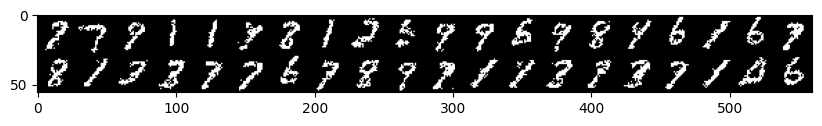

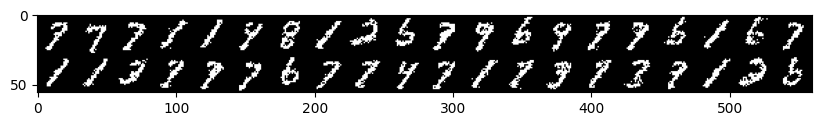

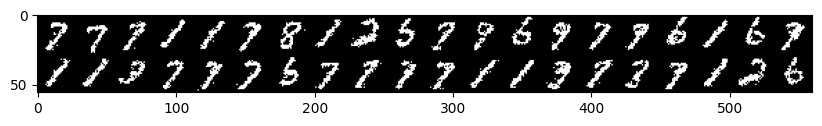

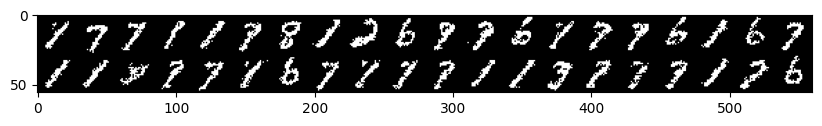

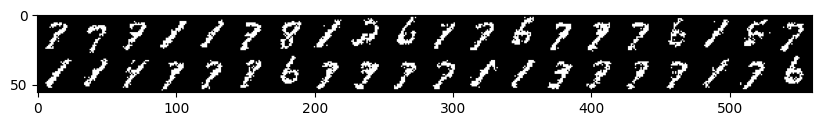

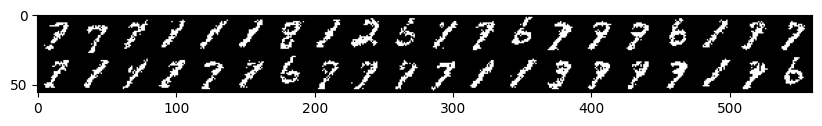

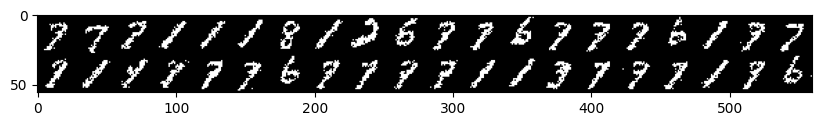

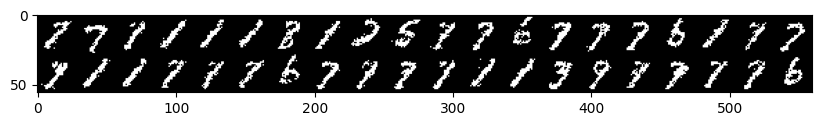

In [13]:
xx = x_train[:40].reshape(40,28*28).copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])
    if ii%100==0:
        plt.figure(figsize=(10,20))
        plt.imshow(gen_mnist_image(xx))

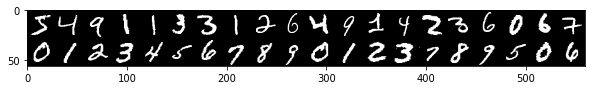

In [17]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(x_train[:40].reshape(40,28*28).copy()))

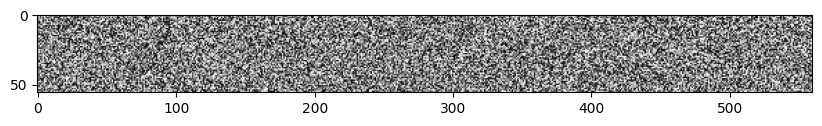

In [14]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image( np.random.uniform(0,1,size=(40,784))))

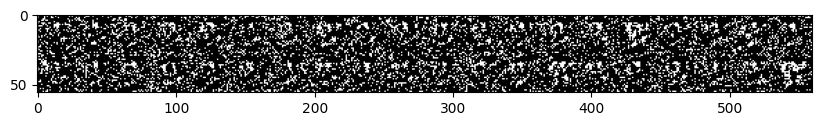

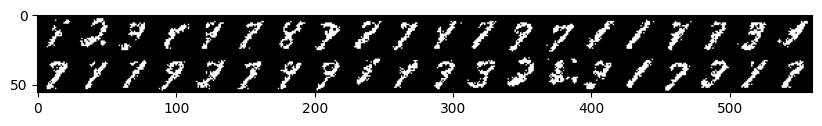

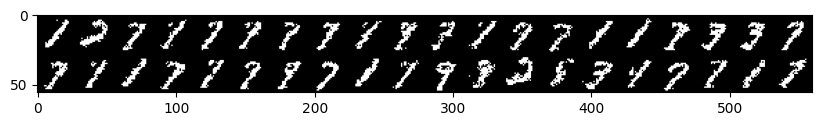

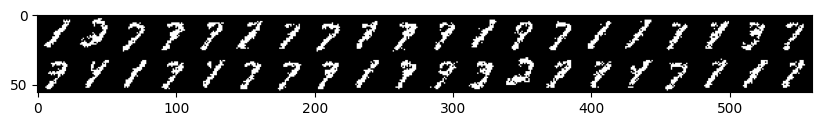

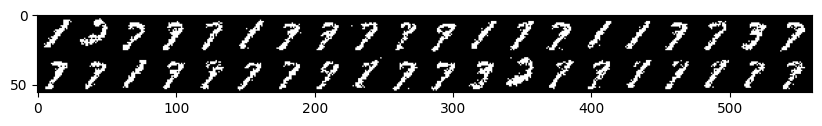

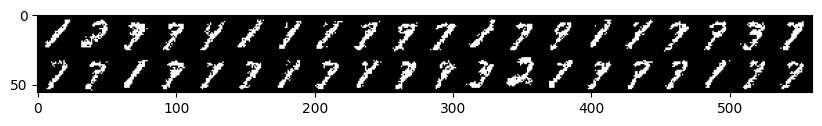

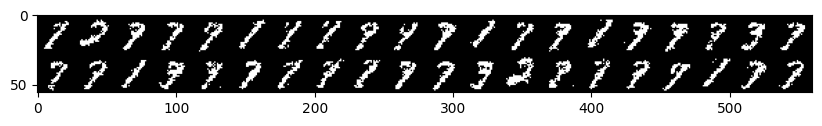

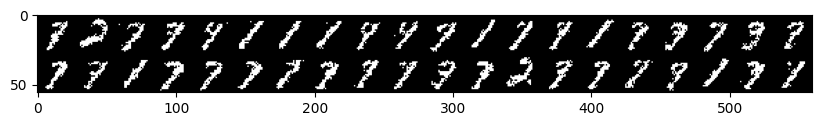

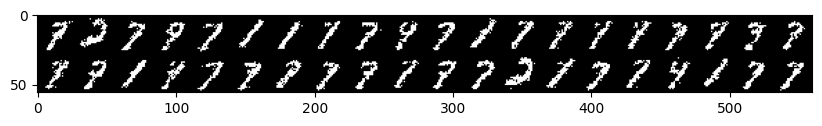

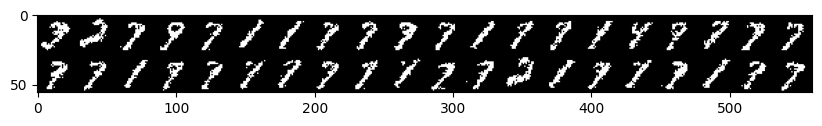

In [15]:
xx = np.random.uniform(0,1,size=(40,784))
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])
    if ii%100==0:
        plt.figure(figsize=(10,20))
        plt.imshow(gen_mnist_image(xx))

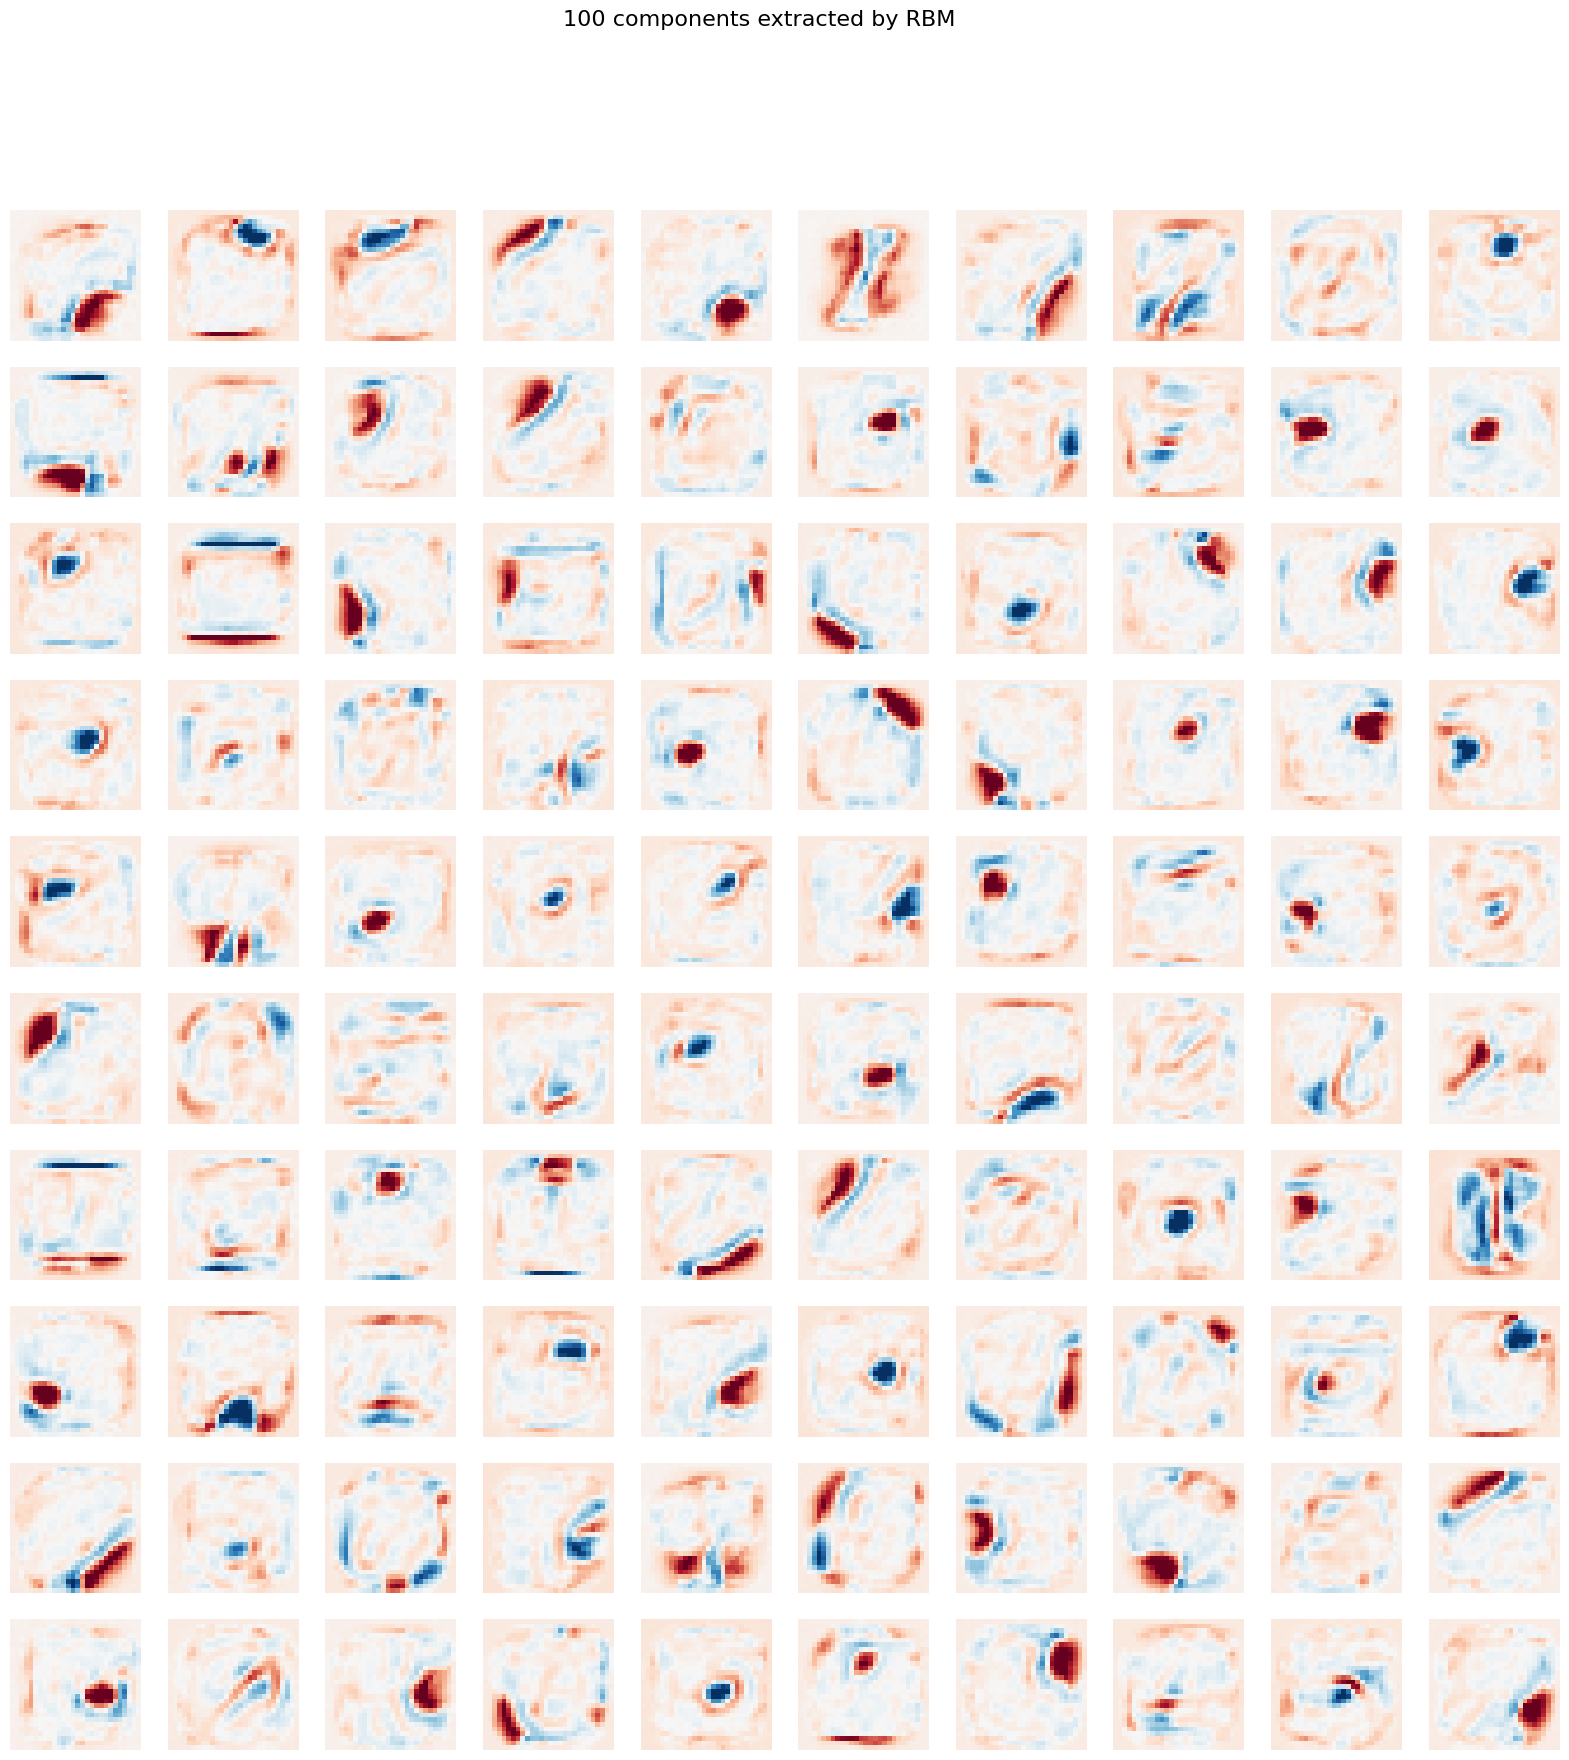

In [16]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16);



In [24]:
np.shape(rbm.components_)

(100, 784)